<a href="https://colab.research.google.com/github/qkrcks0/kaggle_rock_scissor_paper/blob/main/kaggle_rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 압축 풀기
!unzip -q /content/drive/MyDrive/kaggle_rock_scissor_paper.zip -d kaggle

In [ ]:
import os

In [ ]:
train_dir = os.path.join("kaggle/Rock-Paper-Scissors/train/")
test_dir = os.path.join("kaggle/Rock-Paper-Scissors/test/")
val_dir = os.path.join("kaggle/Rock-Paper-Scissors/validation/")

In [ ]:
train_dir, test_dir, val_dir

('kaggle/Rock-Paper-Scissors/train/',
 'kaggle/Rock-Paper-Scissors/test/',
 'kaggle/Rock-Paper-Scissors/validation/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import glob

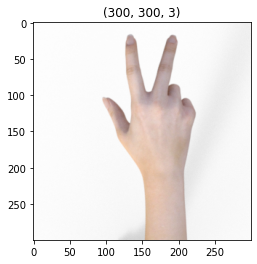

In [ ]:
sample_scissor_img_path = os.listdir(train_dir + "scissors")[14]
sample_scissor_img = np.array(load_img(train_dir + "scissors/" + sample_scissor_img_path))
plt.title(sample_scissor_img.shape)
plt.imshow(sample_scissor_img)
plt.show()

In [ ]:
train_data = glob.glob(train_dir+"*/*.png")
len(train_data)

2520

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
input_shape = (300,300,3)
batch_size = 32
num_epochs = 10
learning_rate = 0.0001

In [ ]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Conv2D(128, (3,3), activation="relu", input_shape=(300,300,3)))
    model.add(layers.MaxPool2D(2,2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(3, activation="softmax"))
    
    return model

In [ ]:
model = create_model()

In [ ]:
# learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                         decay_steps=len(train_data)//batch_size*5,
                                                         decay_rate=0.5,
                                                         staircase=True)

In [ ]:
model.compile(optimizer=Adam(lr_schedule),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range=0.1,
    rescale=1./255.,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    )

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300), 
                                                  batch_size=batch_size)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [71]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [72]:
label = ["paper", "rock", "scissors"]

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=num_epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/5
79/79 [==============================] - 520s 7s/step - loss: 0.5643 - accuracy: 0.7517 - val_loss: 3.6980 - val_accuracy: 0.3342
Epoch 2/5
79/79 [==============================] - 512s 6s/step - loss: 0.0262 - accuracy: 0.9951 - val_loss: 2.7750 - val_accuracy: 0.3666
Epoch 3/5
79/79 [==============================] - 513s 6s/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 2.8236 - val_accuracy: 0.3827
Epoch 4/5
79/79 [==============================] - 514s 7s/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 2.5996 - val_accuracy: 0.5418
Epoch 5/5
79/79 [==============================] - 511s 6s/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 1.9936 - val_accuracy: 0.6038


In [56]:
paths = os.listdir(val_dir)

test_imgs = []
for path in paths:
  img = np.array(load_img(val_dir+path))
  test_imgs.append(img)

test_imgs[0].shape

(300, 300, 3)

In [59]:
import cv2

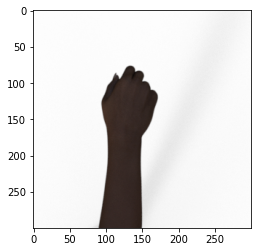

In [80]:
# test_img = cv2.cvtColor(test_imgs[1])
plt.imshow(test_imgs[3])
plt.show()

In [75]:
def predict(target_img):
  pred = model.predict(target_img.reshape((1,300,300,3)))
  predIdx = np.argmax(pred)
  return label[predIdx]

In [81]:
predict(test_imgs[3])

'rock'